# User Story 1
- User initializes several algorithm and dataset combinations
- the respective objects are created and substeps of the experiment pipeline are executed subsequently.
- Users algorithm choice is MR-Hydra, Weasel-V2 and QUANT (which are the best performing & most time efficient of their category). 
- Datasets involved are: ElectricDevices(10%) and LargeKitchenApplications
- Sometimes the user is interested in visualizing the data before applying DCA. Some performance metrics are visualized

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
from basic_func import dataset_provider,dataset_overview, apply_TSC_algos
from apply_dca import apply_label_errors, visualize_acc_decr, visualize_trace_M

In [ ]:
# Classifier MR-Hydra, Dataset Beef 100%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
#x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = _set_bakeoff_classifier(CLASSIFIER_NAME, random_state=0, n_jobs=1)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_, trace_M_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DS_SHORTCT, stop=DoE_PARAM["stop"],
                                   stop_percentage=0.8,  step=DoE_PARAM["step"])

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
File exists: simulation_results/QUANT/ElectricDevices/ElectricDevices_res_0_0_400_5.csv
File exists: simulation_results/QUANT/ElectricDevices/ElectricDevices_pred_0_0_400_5.csv
File exists: simulation_results/QUANT/ElectricDevices/ElectricDevices_trace_0_0_400_5.csv


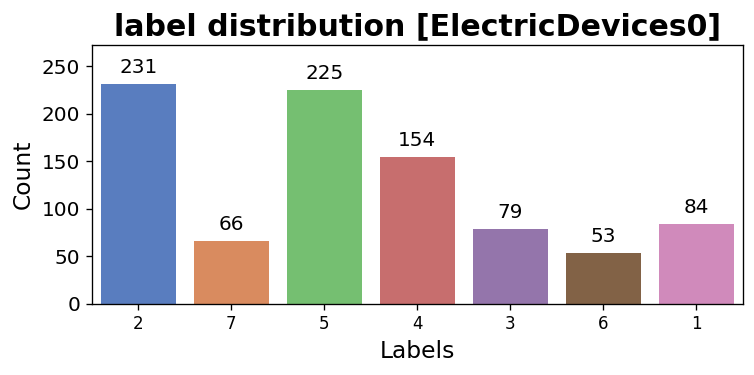

In [ ]:
# Classifier Quant, Dataset ED
ds_ED, meta_ED = dataset_provider(name="ElectricDevices", reduction_factor=10, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=ds_ED["y_train_small"] , dataset_name="ElectricDevices0")
QUANT= _set_bakeoff_classifier("quant", random_state=0, n_jobs=1)
cl_dict = {"QUANT":QUANT}
df_ED_QUANT, trace_m_ED_QUANT = apply_label_errors(train_test_df=ds_ED, cl_dict=cl_dict, ds_="ElectricDevices",
                                                    stop=400, step=5, stop_percentage=0.8)

(0.0, 0.456225)


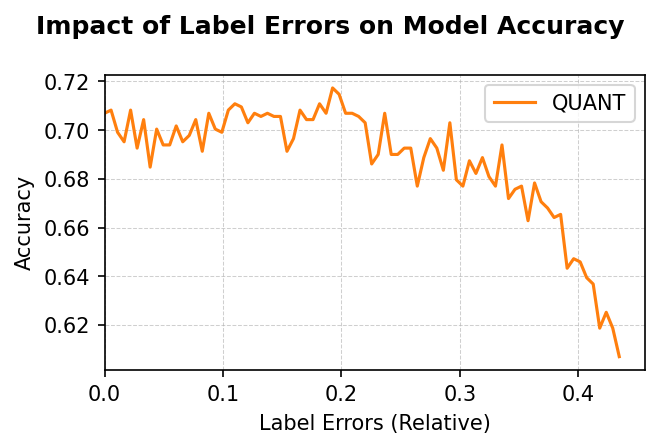

In [59]:
visualize_acc_decr(df_acc_inst_rel=df_ED_QUANT, dpi_=150, first="relative", second=None, w_=4.5, h_=3,
                   cl_="QUANT", ds_="ElectricDevices", save_fig=True)

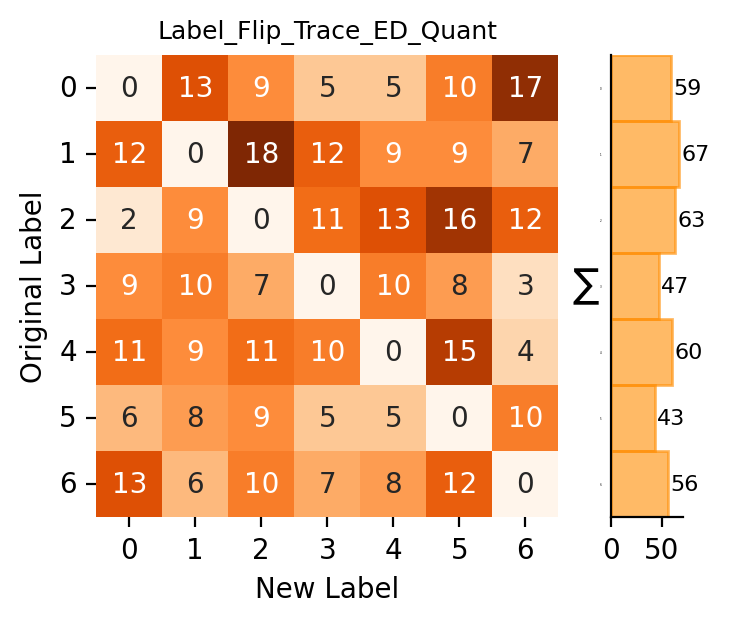

In [61]:
visualize_trace_M(trace_M=trace_m_ED_QUANT, cl_="Quant", ds_="ED",dpi=200, filename_="trace_M", save_fig=False, exp_folder=None)

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
File exists: simulation_results/Weasel-D/ElectricDevices/ElectricDevices_res_0_0_400_5.csv
File exists: simulation_results/Weasel-D/ElectricDevices/ElectricDevices_pred_0_0_400_5.csv
File exists: simulation_results/Weasel-D/ElectricDevices/ElectricDevices_trace_0_0_400_5.csv


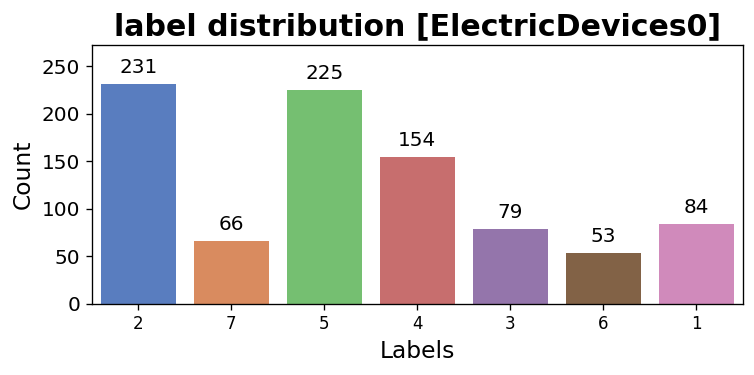

In [ ]:
#Classifier Weasel-D, Dataset ED
ds_ED, meta_ED = dataset_provider(name="ElectricDevices", reduction_factor=10, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=ds_ED["y_train_small"] , dataset_name="ElectricDevices0")
Weasel_D= _set_bakeoff_classifier("Weasel-D", random_state=0, n_jobs=1)
cl_dict = {"Weasel-D":Weasel_D}
df_ED_W2, trace_m_ED_W2 = apply_label_errors(train_test_df=ds_ED, cl_dict=cl_dict, ds_="ElectricDevices",
                                                                stop=400, step=5, stop_percentage=0.8)

(0.0, 0.456225)


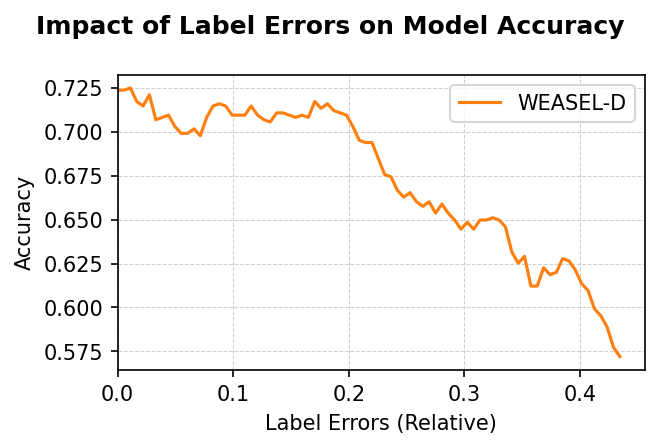

In [63]:
visualize_acc_decr(df_acc_inst_rel=df_ED_W2, dpi_=150, first="relative", second=None, w_=4.5, h_=3,
                   cl_="WEASEL-D", ds_="ElectricDevices", save_fig=True)

X_train             : (375, 1, 720)
y_train             : (375,)
X_test              : (375, 1, 720)
y_test              : (375,)
X_train_small       : (375, 1, 720)
y_train_small       : (375,)
X_test_small        : (375, 1, 720)
y_test_small        : (375,)
Classifier: WEASEL_V2
---------------------------- Train time=18.02s, Eval Time=21.94s

Algorithm                         Accuracy
Weasel-D                          0.8107
current iteration: 0   current LE_step: 0 error_relative: 0
changed label 2 to 3 at index 236 of the data
changed label 3 to 2 at index 366 of the data
changed label 2 to 1 at index 189 of the data
changed label 1 to 3 at index 90 of the data
changed label 2 to 1 at index 187 of the data
current class balance distribution: {'1': 126, '2': 123, '3': 126}
Classifier: WEASEL_V2
---------------------------- Train time=17.13s, Eval Time=22.20s

Algorithm                         Accuracy
Weasel-D                          0.7840
current iteration: 1   current LE_step: 

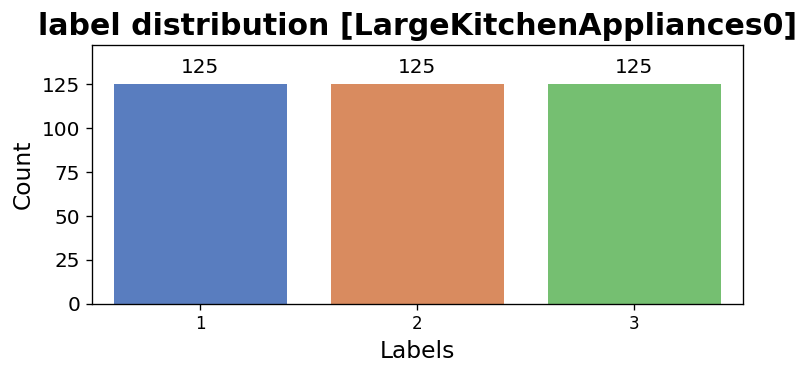

In [ ]:
# Classifier Weasel-D, Dataset LKA
ds_LKA, meta_LKA = dataset_provider(name="LargeKitchenAppliances", reduction_factor=1, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=ds_LKA["y_train_small"] , dataset_name="LargeKitchenAppliances0")
Weasel_D = _set_bakeoff_classifier("Weasel-D", random_state=0, n_jobs=1)
cl_dict2 = {"Weasel-D": Weasel_D}
df_LKA_W2, res_LKA_W2, trace_m_LKA_W2 = apply_label_errors(train_test_df=ds_LKA, cl_dict=cl_dict2, ds_="LKA", stop=180, stop_percentage=0.7,  step=5)

(0.0, 0.496125)


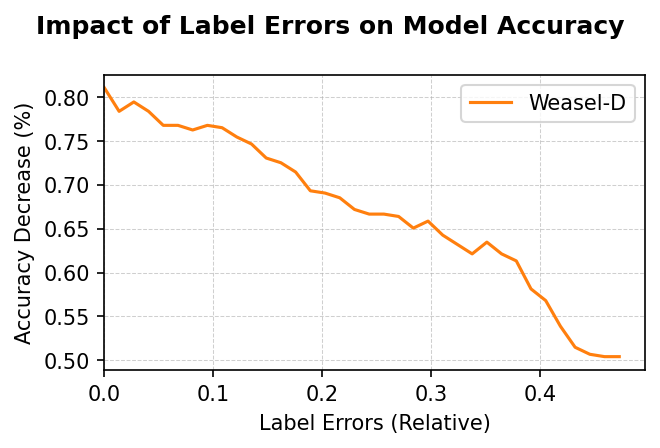

In [54]:
visualize_acc_decr(df_acc_inst_rel=df_LKA_W2, dpi_=150, first="relative", second=None, w_=4.5, h_=3,
                   cl_="Weasel-D", ds_="LargeKitchenApplications", save_fig=True)

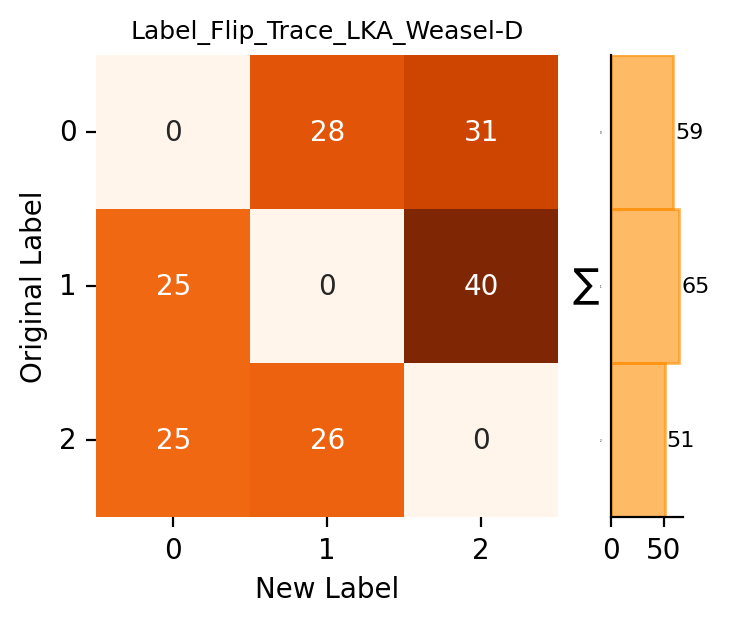

In [ ]:
visualize_trace_M(trace_M=trace_m_LKA_W2, cl_="Weasel-D", ds_="LKA",dpi=200, filename_="trace_M", save_fig=False, exp_folder=None)